# 1. Import libraries and The data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("train.csv")
dataset = dataset.iloc[:, 1:]
dataset.shape

(614, 12)

In [3]:
dataset.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# Change missing value with imputer
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dataset.iloc[:, 5:9] = imputer_mean.fit_transform(dataset.iloc[:, 5:9])

imputer_frequency = SimpleImputer(strategy='most_frequent')
categorical_index = [0, 1, 2, 4, 9]
for i in categorical_index:
    dataset.iloc[:, i] = imputer_frequency.fit_transform(dataset.iloc[:, i].values.reshape(-1, 1))
dataset.isnull().sum()

/var/folders/5l/gpxf0q0109zg94jq7ssf5dj40000gn/T/ipykernel_16960/2271949140.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[:, 5:9] = imputer_mean.fit_transform(dataset.iloc[:, 5:9])


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


In [6]:
 dataset.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
dataset.columns, dataset.dtypes

(Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome      float64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 Loan_Status           object
 dtype: object)

In [8]:
dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
dataset.loc[dataset.duplicated()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [10]:
dataset.loc[dataset.duplicated(subset=["ApplicantIncome"])]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.000000,360.0,0.0,Semiurban,N
38,Male,No,0,Graduate,No,4166.0,7210.0,184.000000,360.0,1.0,Urban,Y
60,Male,Yes,0,Graduate,No,2500.0,3796.0,120.000000,360.0,1.0,Urban,Y
64,Female,No,0,Graduate,No,4166.0,0.0,116.000000,360.0,0.0,Semiurban,N
66,Male,No,0,Not Graduate,No,3200.0,2254.0,126.000000,180.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
602,Male,Yes,3+,Graduate,No,5703.0,0.0,128.000000,360.0,1.0,Urban,Y
604,Female,Yes,1,Graduate,No,12000.0,0.0,496.000000,360.0,1.0,Semiurban,Y
605,Male,Yes,0,Not Graduate,No,2400.0,3800.0,146.412162,180.0,1.0,Urban,N
606,Male,Yes,1,Graduate,No,3400.0,2500.0,173.000000,360.0,1.0,Semiurban,Y


In [11]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# 2. Data prerocessing

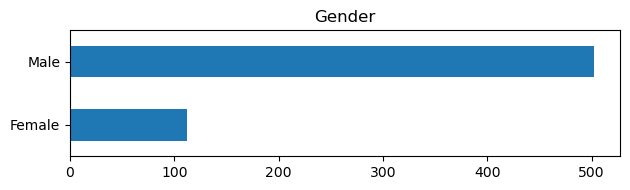

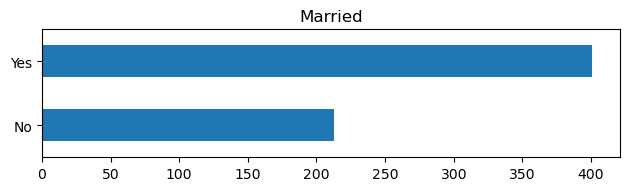

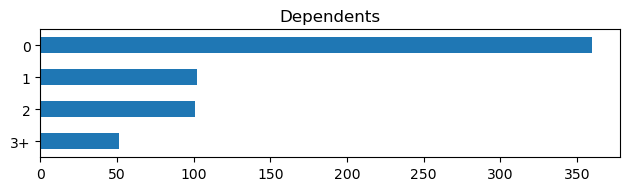

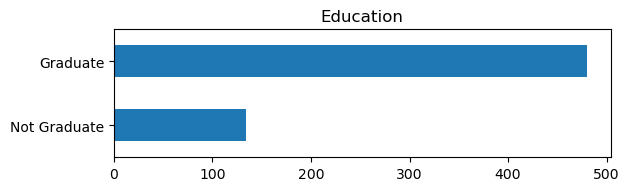

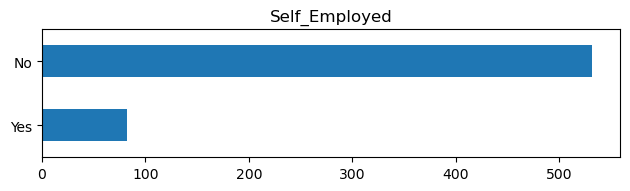

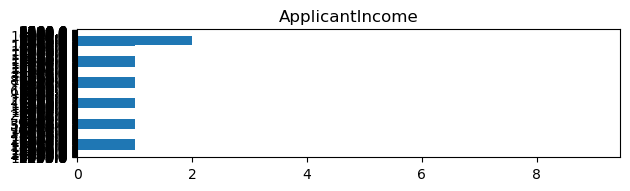

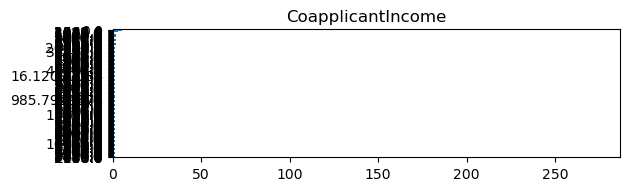

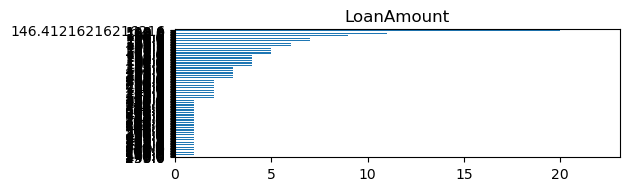

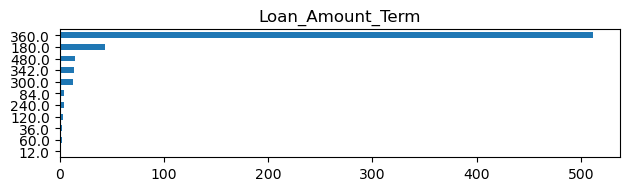

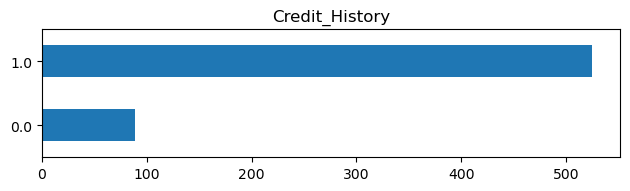

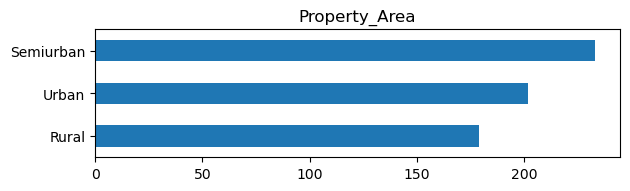

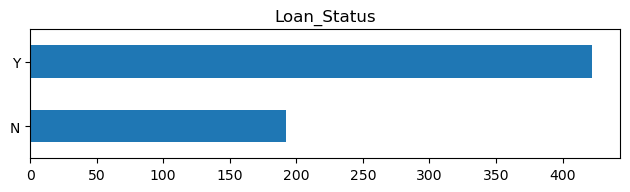

In [12]:
for i, names_columns in enumerate(dataset.columns):
    plt.subplot(len(dataset.columns), 1, i+1)
    dataset[names_columns].value_counts().sort_values().plot(kind="barh")
    plt.title(names_columns)
    plt.tight_layout(rect=[0, 0, 1, 3.96], h_pad=0.5) # [x, y, width, height]
    plt.show()

In [13]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


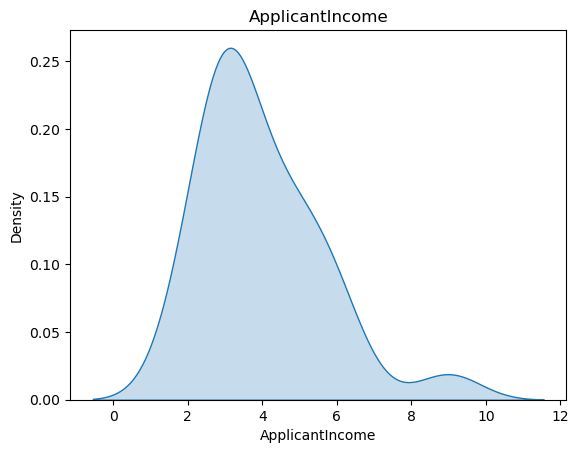

In [14]:
# Applicant Home, CoapplicantIncome, LoanAmount is not clear
import seaborn as sns
appIncome = dataset["ApplicantIncome"].value_counts().head(25).sort_values()
sns.kdeplot(appIncome, fill=True)
plt.title("ApplicantIncome")
plt.show()

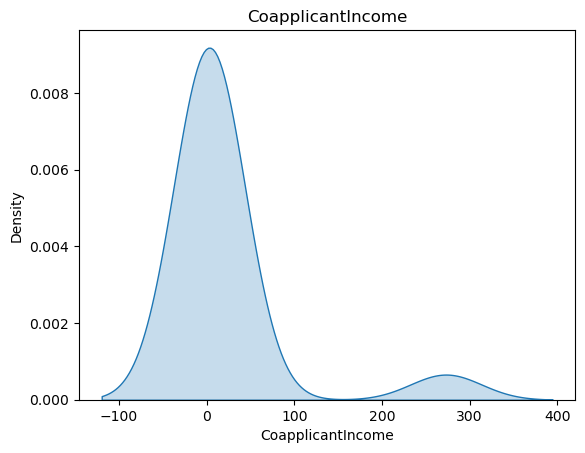

In [15]:
CoappIncome = dataset["CoapplicantIncome"].value_counts().head(15).sort_values(ascending=False)
sns.kdeplot(CoappIncome, fill=True)
plt.title("CoapplicantIncome")
plt.show()

In [16]:
dataset["LoanAmount"].value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64

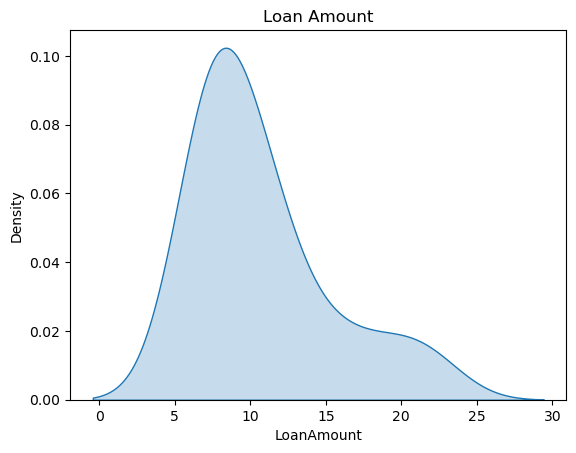

In [17]:
loanAmount = dataset["LoanAmount"].value_counts().head(20).sort_values(ascending=True)
import seaborn as sns
sns.kdeplot(loanAmount, fill=True)
plt.title("Loan Amount")
plt.show()

In [18]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


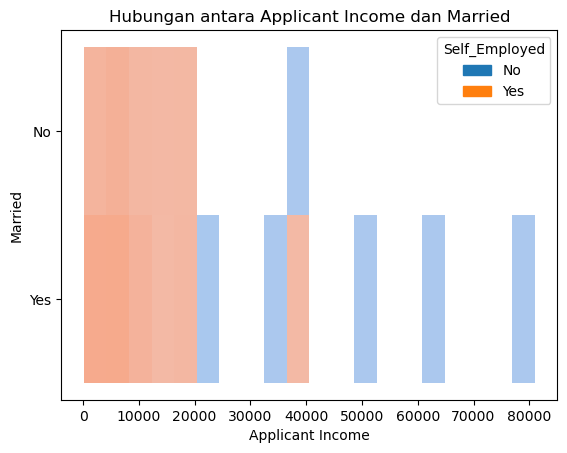

In [19]:
import seaborn as sns

# Menggunakan seaborn untuk membuat histogram 2D
sns.histplot(data=dataset, x='ApplicantIncome', y='Married', hue="Self_Employed", bins=20)

# Menambahkan label dan judul
plt.xlabel('Applicant Income')
plt.ylabel('Married')
plt.title('Hubungan antara Applicant Income dan Married')

# Menampilkan plot
plt.show()


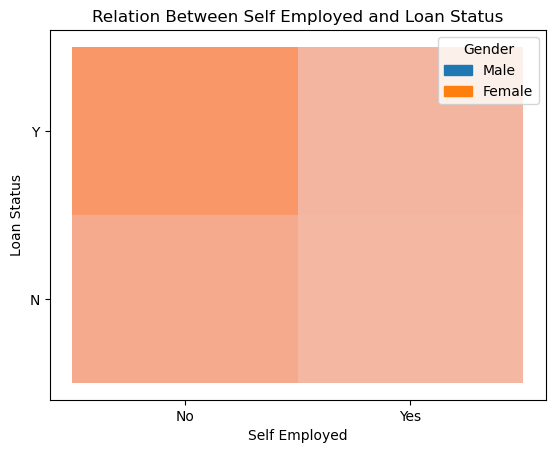

In [20]:
# Visualise data to Histogram
sns.histplot(data=dataset, x='Self_Employed', y='Loan_Status', hue="Gender", bins=20)

# Add Label and Title
plt.xlabel('Self Employed')
plt.ylabel('Loan Status')
plt.title('Relation Between Self Employed and Loan Status')

# Menampilkan plot
plt.show()


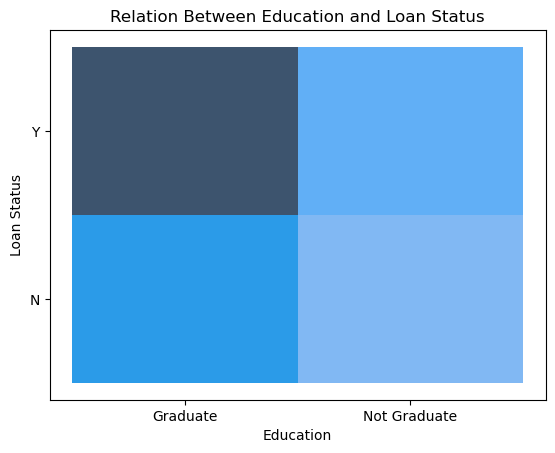

In [21]:
# Visualise data to Histogram
sns.histplot(data=dataset, x='Education', y='Loan_Status', bins=20)

# Add Label and Title
plt.xlabel('Education')
plt.ylabel('Loan Status')
plt.title('Relation Between Education and Loan Status')

# Menampilkan plot
plt.show()


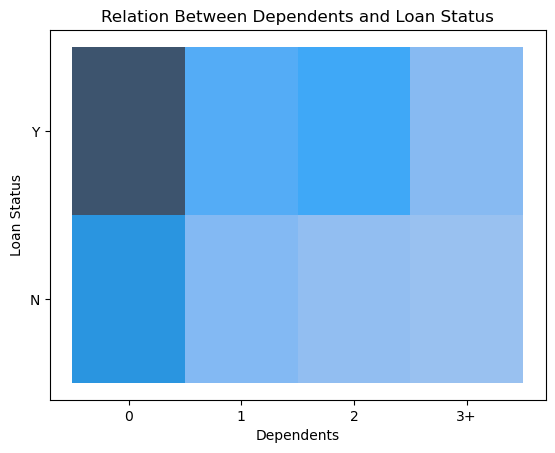

In [22]:
# Visualise data to Histogram
sns.histplot(data=dataset, x='Dependents', y='Loan_Status', bins=20)

# Add Label and Title
plt.xlabel('Dependents')
plt.ylabel('Loan Status')
plt.title('Relation Between Dependents and Loan Status')

# Menampilkan plot
plt.show()


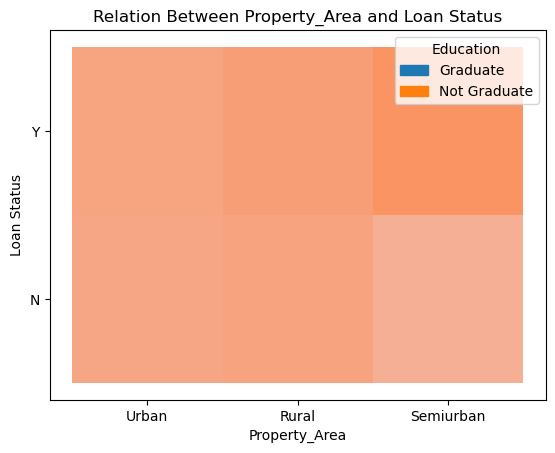

In [23]:
# Visualise data to Histogram
sns.histplot(data=dataset, x='Property_Area', y='Loan_Status', hue="Education")#, bins=20)

# Add Label and Title
plt.xlabel('Property_Area')
plt.ylabel('Loan Status')
plt.title('Relation Between Property_Area and Loan Status')

# Menampilkan plot
plt.show()


In [24]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


In [25]:
dataset.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

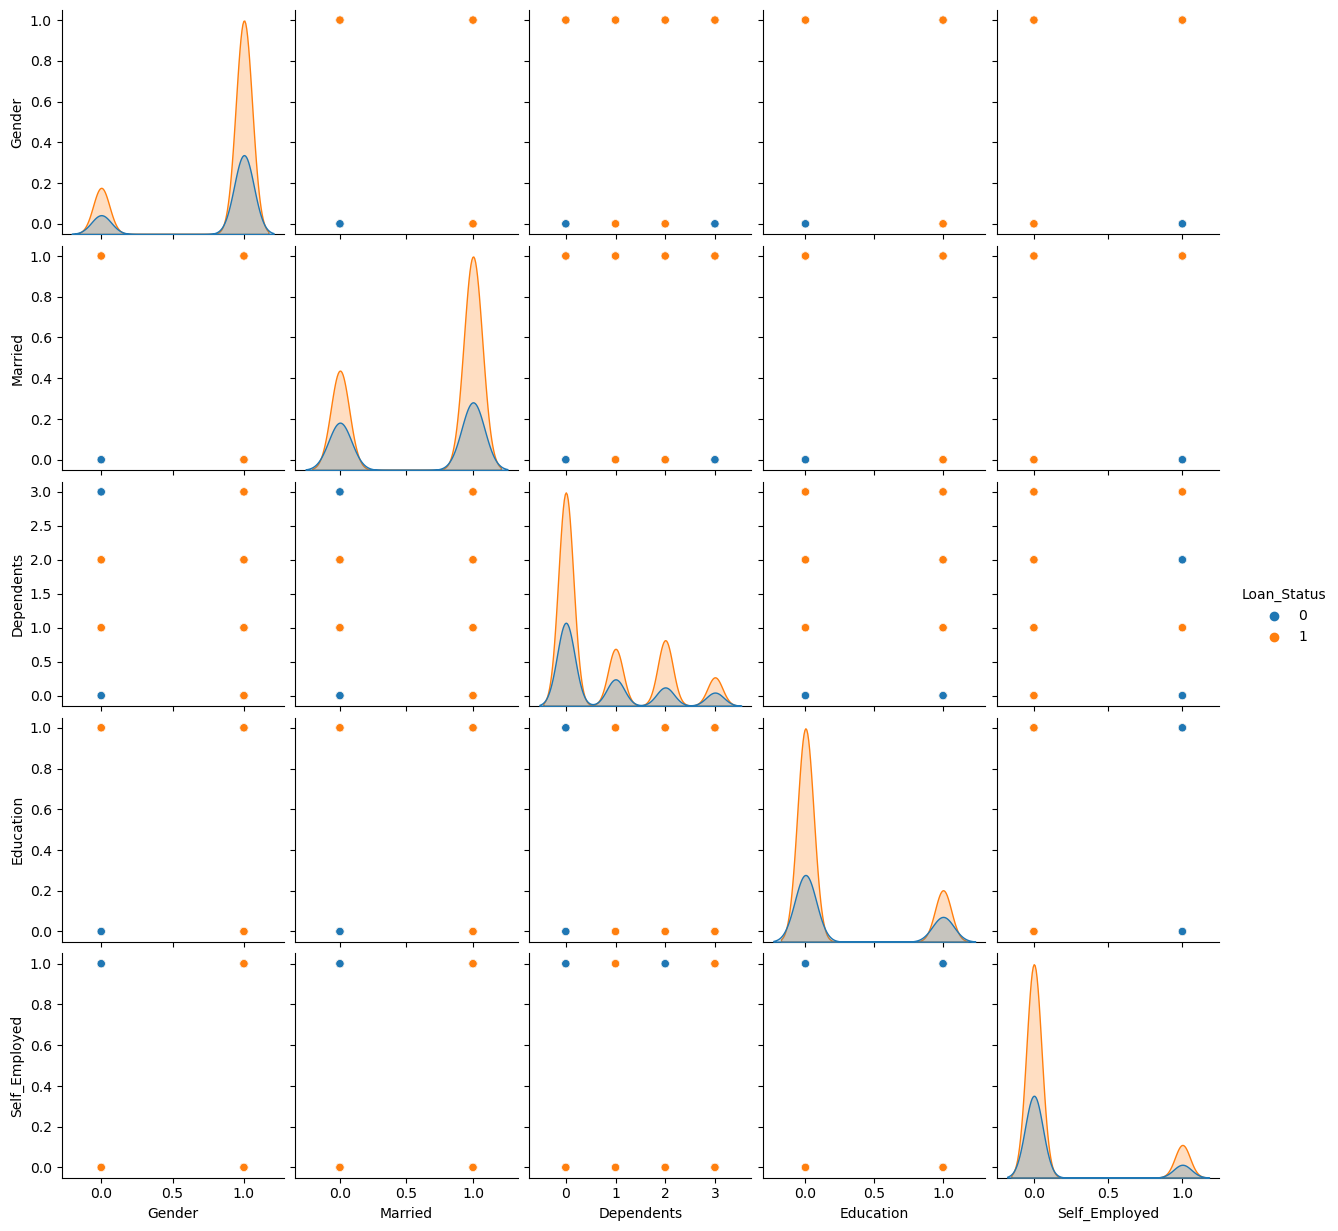

In [26]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
dataset_encoded = dataset.copy()
label_encoder = LabelEncoder()

for column in categorical_columns:
    dataset_encoded[column] = label_encoder.fit_transform(dataset[column])

sns.pairplot(dataset_encoded, 
             vars =['Gender', 'Married', 'Dependents', 'Education',
                   'Self_Employed'],
             hue="Loan_Status",
             diag_kind='kde', 
             diag_kws={'bw_adjust': 0.5})
plt.show()

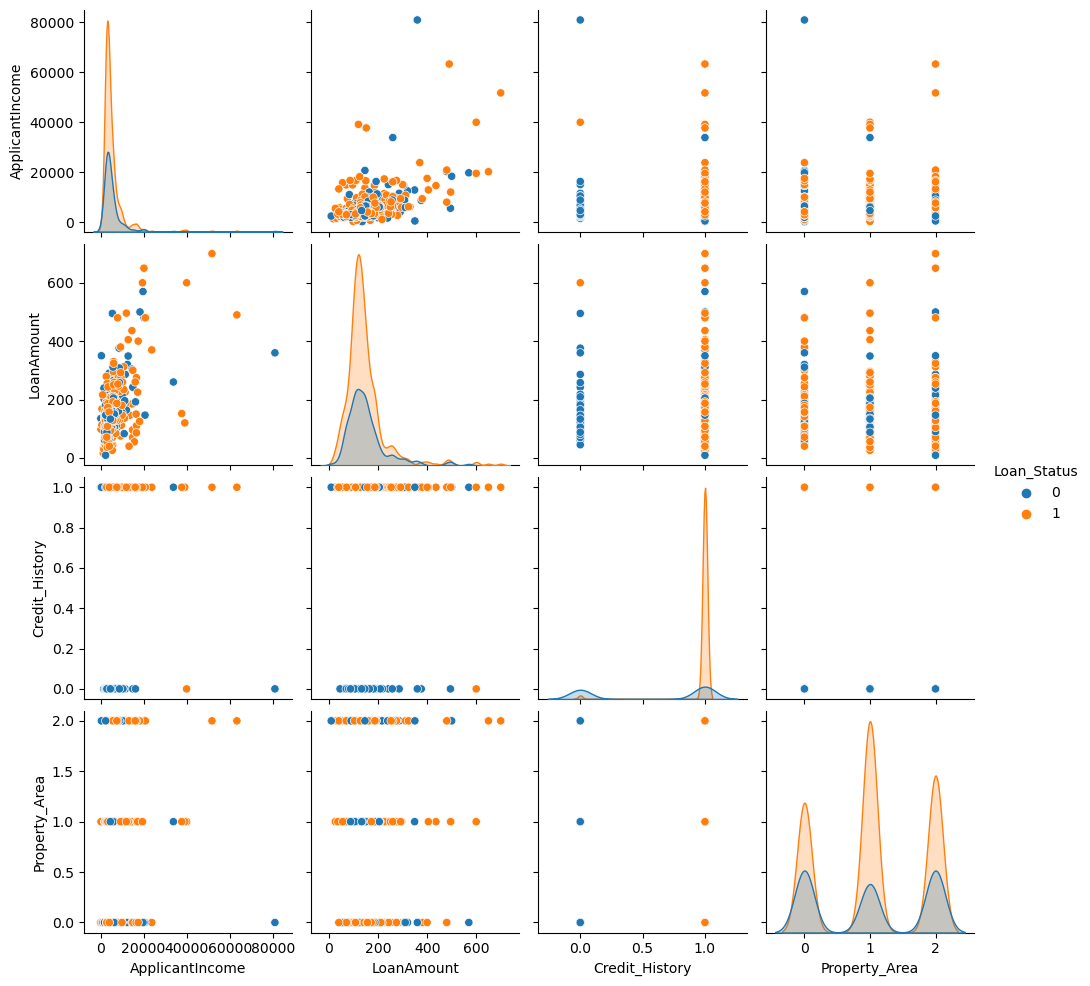

In [27]:
sns.pairplot(dataset_encoded, 
             vars =['ApplicantIncome', 'LoanAmount',
                   'Credit_History', 'Property_Area'],
             hue="Loan_Status",
             diag_kind='kde', 
             diag_kws={'bw_adjust': 0.5})
plt.show()

In [28]:
dataset_encoded.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [30]:
dataset.columns
dataset_corr = dataset_encoded[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']].dropna().corr()
dataset_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


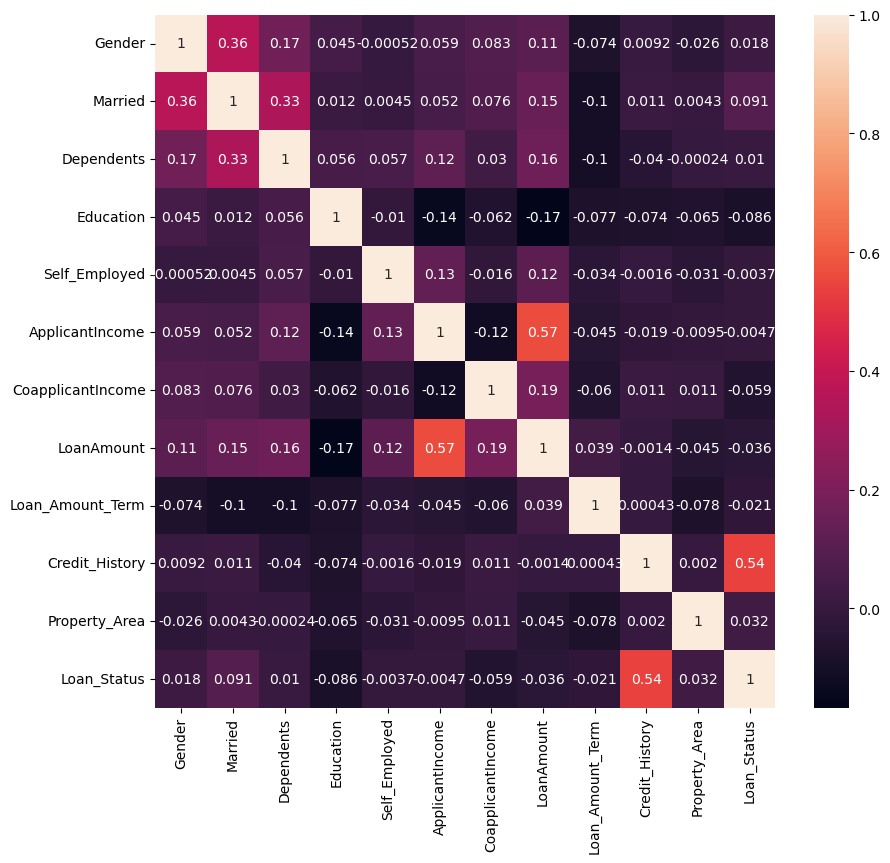

In [31]:
plt.figure(figsize=(10, 9))
sns.heatmap(dataset_corr, annot=True)
plt.show()

In [32]:
dataset_encoded.groupby("Self_Employed")["ApplicantIncome"].agg(["mean", "count"])

,mean,count
Self_Employed,,
0,5098.678571,532
1,7380.817073,82


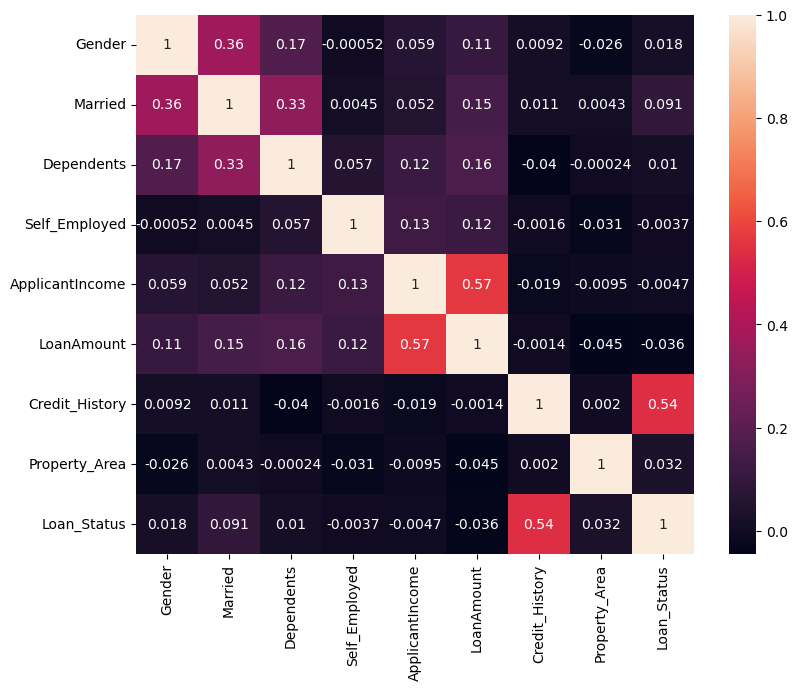

In [50]:
dataset_corr_2 = dataset_encoded[['Gender', 'Married', 'Dependents', 
                               #'Education', 
                              'Self_Employed',
                              'ApplicantIncome', 
                               #'CoapplicantIncome', 
                              'LoanAmount',
                               #'Loan_Amount_Term', 
                              'Credit_History', 'Property_Area', 'Loan_Status']].corr()
plt.figure(figsize=(9, 7))
sns.heatmap(dataset_corr_2, annot=True)
plt.show()

In [33]:
dataset_encoded["Self_Employed"].unique()

array([0, 1])

In [39]:
df = pd.DataFrame(dataset)

In [40]:
df["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)